## Esame Metodi Numerici  12 Giugno 2024 - Turno II Ore 12,30

## Esercizio 1
Si condiderino i due sistemi lineari:

     A  x = b 

    A1 x1 = b1

dove A, A1 sono le matrici dei coefficienti, b e b1 sono i termini noti, ed x ed x1 sono i vettori incongiti da determinare.
I dati di questi due sistemi lineari sono contenuti nel file **testII.mat**.


- Si implementino e si testino sui dati forniti almeno due metodi che sono adatti a risolvere sistemi lineari con le caratteristiche delle matrici dei coefficienti date in input.
                                      **punti 8**
- Si confrontino i risultati ottenuti e si giustifichino utilizzando  e richiamando gli aspetti teorici dei metodi implementati.
                                      **punti 3**


**Totale Punti 11**

Per la lettura dei dati procedere nel seguente modo:

``from scipy.io import loadmat``

``import numpy as np``

``dati = loadmat('testII')``

``A=dati["A"] ``

``A=A.astype(float)``

`` b=dati["b"] ``

`` b=b.astype(float)``

``A1=dati["A1"] ``

``A1=A1.astype(float)``

`` b1=dati["b1"] ``

`` b1=b1.astype(float)``


In [3]:
from scipy.io import loadmat

import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as spLin
import SolveTriangular as St
dati = loadmat('testII')
A=dati["A"] 
A=A.astype(float)
b=dati["b"]
b=b.astype(float)
A1=dati["A1"] 
A1=A1.astype(float)
b1=dati["b1"]
b1=b1.astype(float)

In [4]:
m,n = A.shape
if m==n:
    print("matrice quadrata: ", m)
else:
    print("matrice non quadrata")

matrice quadrata:  500


Sparsità:  8.881784197001252e-22


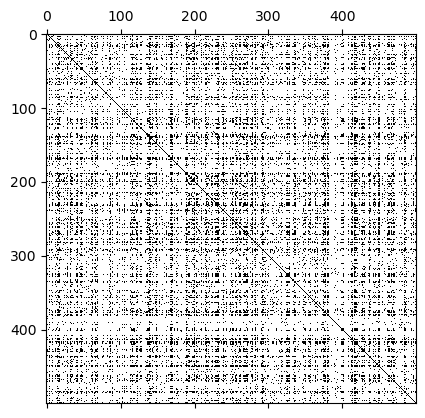

In [5]:
#La matrice è quadrata e di grandi dimensioni, calcoliamo la sparsità
sp=np.spacing(1)/(m*n)
print("Sparsità: ", sp)
plt.spy(A)

In [6]:
flagS = A.T@A
if np.all(flagS== True):
    print("La matrice è simmetrica")
else:
    print("La matrice non è simmetrica")

La matrice non è simmetrica


In [7]:
#La matrice non è simmetrica quindi come metodi Usiamo Jacobi e Gauss-Seidel
def jacobi(A,b,x0,toll,it_max):
    errore=1000
    d=np.diag(A)
    n=A.shape[0]
    invM=np.diag(1/d)
    E=np.tril(A,-1)
    F=np.triu(A,1)
    N=-(E+F)
    T=invM@N 
    autovalori=np.linalg.eigvals(T)
    raggiospettrale=np.max(np.abs(autovalori))
    print("raggio spettrale jacobi", raggiospettrale)
    it=0
    
    er_vet=[]
    while it<=it_max and errore>=toll:
        x=(b+N@x0)/d.reshape(n,1)
        errore=np.linalg.norm(x-x0)/np.linalg.norm(x)
        er_vet.append(errore)
        x0=x.copy()
        it=it+1
    return x,it,er_vet


def gauss_seidel(A,b,x0,toll,it_max):
    errore=1000
    d=np.diag(A)
    D=np.diag(d)
    E=np.tril(A,-1)
    F=np.triu(A,1)
    M=D+E
    N=-F 
    T=np.linalg.inv(M)@N 
    autovalori=np.linalg.eigvals(T)
    raggiospettrale=np.max(np.abs(autovalori))
    print("raggio spettrale Gauss-Seidel ",raggiospettrale)
    it=0
    er_vet=[]
    while it<=it_max and errore >=toll:
        x,flag=St.Lsolve(M, b-F@x0)
        errore=np.linalg.norm(x-x0)/np.linalg.norm(x)
        er_vet.append(errore)
        x0=x.copy()
        it=it+1
    return x,it,er_vet


raggio spettrale jacobi 3.13092926069899
JACOBI

It:  101


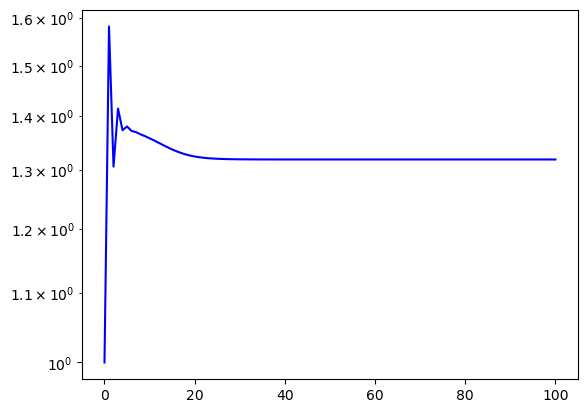

In [16]:
x0 = np.zeros_like(b)
toll=1e-6
it_max=100
xJ, itJ, er_vetJ= jacobi(A, b, x0, toll, it_max)
print("JACOBI\n")
#print("X: ",xJ)
print("It: ", itJ)
plt.semilogy(np.arange(itJ),er_vetJ, 'b-')
plt.show()

raggio spettrale Gauss-Seidel  0.9399020442983527
 GAUSSSEIDEL

It:  101


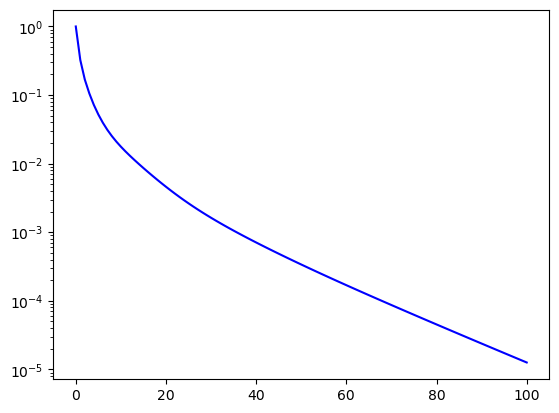

In [15]:
x0 = np.zeros_like(b)
toll=1e-6
it_max=100
xGS, itGS, er_vetGS= gauss_seidel(A, b, x0, toll, it_max)
print(" GAUSSSEIDEL\n")
#print("X: ",xJ)
print("It: ", itGS)
plt.semilogy(np.arange(itGS),er_vetGS, 'b-')
plt.show()

In [20]:
m1,n1 = A1.shape
if m1==n1:
    print("matrice quadrata: ", m1)
else:
    print("matrice non quadrata")

matrice quadrata:  500


sparsità:  8.881784197001252e-22
[[False False  True ...  True  True  True]
 [False False  True ...  True  True  True]
 [ True  True False ... False  True  True]
 ...
 [ True  True False ... False  True  True]
 [ True  True  True ...  True False  True]
 [ True  True  True ...  True  True False]]


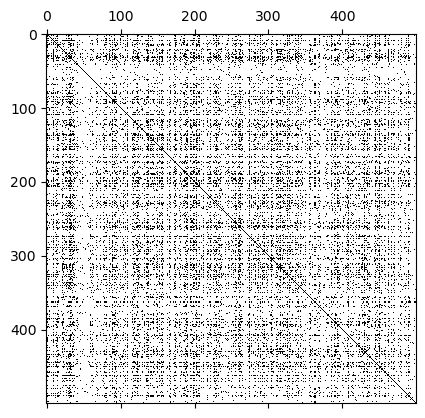

In [24]:
sp1=np.spacing(1)/(m1*n1)
print("sparsità: ", sp1)
plt.spy(A1)

In [26]:
flagS1 = A1.T==A1
if np.all(flagS1==True):
    print("Matrice simmetrica")
else: 
    print("matrice non simmetrica")

Matrice simmetrica


In [28]:
eigvals = np.linalg.eigvals(A1)
if np.all(eigvals)>0:
    print("matrice def pos")
else: 
    print("Matrice non def pos")


matrice def pos


In [40]:
#essendo simmetrica e definita positiva per risolvere usiamo il Gauss-Seidel che abbiamo gia scritto sopra, GS SOR, e il metoodo del gradient
#coniugato
def gauss_seidel_sor(A,b,x0,toll,it_max,omega):
    errore=1000
    d=np.diag(A)
    D=np.diag(d)
    E=np.tril(A,-1)
    F=np.triu(A,1) 
    Momega=D+omega*E
    Nomega=(1-omega)*D-omega*F
    T=np.linalg.inv(Momega)@Nomega
    autovalori=np.linalg.eigvals(T)
    raggiospettrale=np.max(np.abs(autovalori))
    print("raggio spettrale Gauss-Seidel SOR ", raggiospettrale)
    
    M=D+E
    N=-F 
    it=0
    xold=x0.copy()
    xnew=x0.copy()
    er_vet=[]
    while it<=it_max and errore>=toll:
        
        xtilde,flag=St.Lsolve(M, b-F@xold) 
        xnew=(1-omega)*xold+omega*xtilde
        errore=np.linalg.norm(xnew-xold)/np.linalg.norm(xnew)
        er_vet.append(errore)
        xold=xnew.copy()
        it=it+1
    return xnew,it,er_vet



def steepestdescent(A,b,x0,itmax,tol):
 
    n,m=A.shape
    if n!=m:
        print("Matrice non quadrata")
        return [],[]
    
    
   # inizializzare le variabili necessarie
    x = x0

     
    r = A@x-b
    p = -r 
    it = 0
    nb=np.linalg.norm(b)
    errore=np.linalg.norm(r)/nb
    vec_sol=[]
    vec_sol.append(x.copy())
    vet_r=[]
    vet_r.append(errore)
     
# utilizzare il metodo del gradiente per trovare la soluzione
    while it<itmax and errore>=tol:
        it=it+1
        Ap=A@p
       
        alpha = -(r.T@p)/(p.T@Ap)
                
        x = x+alpha*p
        
         
        vec_sol.append(x.copy())
        r=r+alpha*Ap
        errore=np.linalg.norm(r)/nb
        vet_r.append(errore)
        p =-r
        
    iterates_array = np.vstack([arr.T for arr in vec_sol])
    return x,vet_r,iterates_array,it


def conjugate_gradient(A,b,x0,itmax,tol):
    n,m=A.shape
    if n!=m:
        print("Matrice non quadrata")
        return [],[]
    
    
   # inizializzare le variabili necessarie
    x = x0
    
    r = A@x-b 
    p = -r 
    it = 0
    nb=np.linalg.norm(b)
    errore=np.linalg.norm(r)/nb
    vec_sol=[]
    vec_sol.append(x0.copy())
    vet_r=[]
    vet_r.append(errore)
# utilizzare il metodo del gradiente coniugato per calcolare la soluzione
    while it<=itmax and errore>=tol:
        it=it+1
        Ap=A@p
        alpha = -(r.T@p)/(p.T@Ap)
        x = x+alpha*p
        vec_sol.append(x.copy())
        rtr_old=r.T@r
        r= r+alpha*Ap
        gamma=(r.T@r)/rtr_old 
        errore=np.linalg.norm(r)/nb
        vet_r.append(errore)
        p = -r*gamma*p
   
    iterates_array = np.vstack([arr.T for arr in vec_sol])
    return x,vet_r,iterates_array,it



raggio spettrale Gauss-Seidel SOR  0.8919564407267031
GS SOR

It:  120


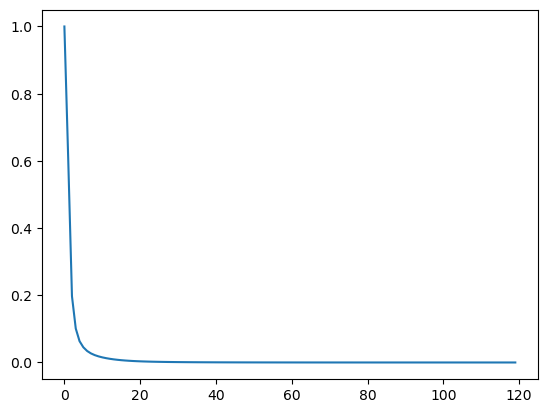

In [33]:
x01=np.zeros_like(b1)
tol=1e-6
it_max=1000
omega = 1.2

xnewSOR,itSOR,er_vetSOR=gauss_seidel_sor(A,b,x0,toll,it_max,omega)
print("GS SOR\n")
print("It: ", itSOR)
plt.plot(np.arange(itSOR),er_vetSOR)
plt.show()

STEEPEST DESCENT

It:  421


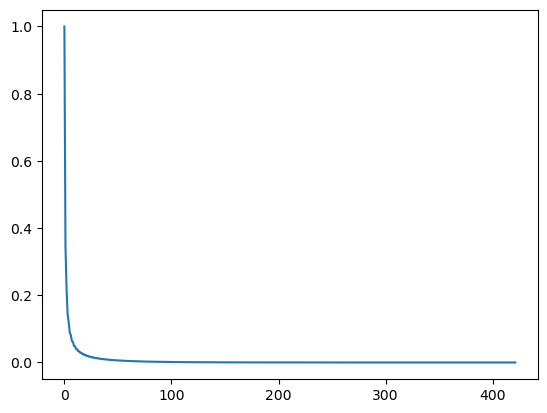

In [42]:
x01=np.zeros_like(b1)
tol=1e-6
it_max=1000
omega = 1.2

xSD,vet_rSD,iterates_arraySD,itSD=steepestdescent(A,b,x0,it_max,tol)
print("STEEPEST DESCENT\n")
print("It: ", itSD)
plt.plot(np.arange(itSD+1),vet_rSD)
plt.show()

Gradient

It:  265


/var/folders/99/94z23fnx5pbdypv066f46mjw0000gn/T/ipykernel_92196/1816960939.py:99: RuntimeWarning: divide by zero encountered in divide
  alpha = -(r.T@p)/(p.T@Ap)
/var/folders/99/94z23fnx5pbdypv066f46mjw0000gn/T/ipykernel_92196/1816960939.py:100: RuntimeWarning: invalid value encountered in multiply
  x = x+alpha*p
/var/folders/99/94z23fnx5pbdypv066f46mjw0000gn/T/ipykernel_92196/1816960939.py:103: RuntimeWarning: invalid value encountered in multiply
  r= r+alpha*Ap


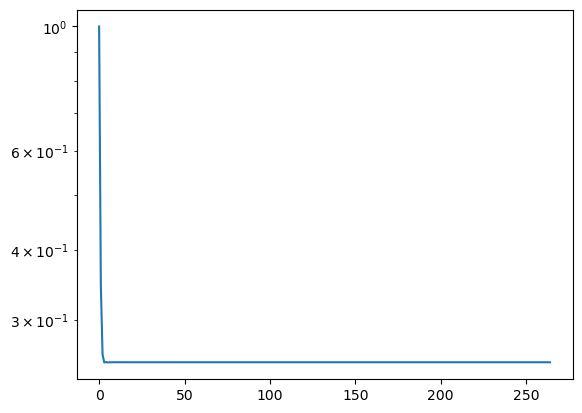

In [45]:
x01=np.zeros_like(b1)
tol=1e-6
it_max=1000
omega = 1.2

xG,vet_rG,iterates_arrayG,itG=conjugate_gradient(A,b,x0,it_max,tol)
print("Gradient\n")
print("It: ", itG)
plt.semilogy(np.arange(itG+1),vet_rG)
plt.show()

# Esercizio 2

-  Si consideri la funzione $$f(x)=2\cdot x^4-(7/2) \cdot x^3+(3/4) \cdot x^2+x-1/4$$  

-  Si rappresenti il grafico della funzione in [-1,2] e si determini in quanti punti la funzione si annulla.  **[punti: 1]**

-  Si implementi  il metodo di Newton per il calcolo degli zeri di una funzione non lineare. **[punti: 3]**

-  Si implementi il metodo di Bisezione per il calcolo degli zeri di una funzione non lineare. **[punti: 3]**

-  Osservando il grafico della funzione, si identifichi,  per ogni punto in cui si annulla, un opportuno intervallo che lo contenga. Si applichi il metodo di Bisezione per determinare lo zero della funzione in tale sottointervallo.  Si dica se è possibile calcolare tutti gli zeri facendo uso del metodo di bisezione, richiamando il teorema su cui si basa il metodo di bisezione.  **[punti: 2]**

-  Osservando il grafico della funzione, si identifichi,  per ogni punto in cui si annulla, un opportuno iterato iniziale in un intorno dello zero e si utilizzi  il metodo di Newton per determinare lo zero della funzione. Si calcoli l'ordine del metodo usando la funzione stima_ordine.
   **[punti: 2]**

-  Nel caso in cui si verifichi che il metodo di Newton abbia ordine 1, spiegare il perchè richiamando la teoria e modificare il metodo affinchè il suo ordine sia 2.  **[punti: 3]**

  **Totale punti 14**





## Domande Intelligenza Artificiale
**NB: Ogni risposta esatta +0.5 punti, ogni risposta errata -0.5 punti. La mancanza di risposta 0 punti**

**1 Risolvere un problema mediante Machine Learning significa:**

 -  Fornire alla macchina i dati affinchè impari da sola a risolvere il problema

 - Fornire alla macchina solo dati etichettati affinchè impari da sola a risolvere il problema

 - Fornire alla macchina solo dati non etichettati affinchè impari da sola a risolvere il problema

 - Fornire alla macchina le esatte istruzioni per risolvere il problema

**2  A cosa serve il validation set?**

-  A trovare i migliori iperparametri del modello

-  Ad addestrare il modello

-  A testare il modello

-  A trovare le etichette dei dati di input

**3  Cosa è un Multi-Layer Perceptron?**

-  Una rete multi-livello composta da neuroni completamente connessi

-  Una rete muti-livello composta da livelli convolutivi e neuroni completamente connessi

-  Una rete a singolo livello composta da neuroni completamente connessi

- Un neurone artificiale con un determinato input e determinati valori di uscita

**4 Il livello softmax**

- Trasforma i digits della rete in probabilità

- Trasforma le probabilità della rete in digits

-  Normalizza i valori di input della rete

-  È indispensabile nel task di regressione

**5 In cosa consiste il task di regressione?**

· Nel predire un valore continuo in output

· Nel predire una classe in output

· Nel predire un gruppo di appartenenza del dato di input

· Nel predire una categoria in output

## Domande Aperte

**6. ** Forward e backward Propagation per l'allenamento di una rete neurale** [punti 1.5]

**7 Metodo di ottimizzazione del gradient descent con momento**. Motivazioni e formula di aggiornamento dei pesi e commenti. [punti 3]

In [ ]:
**